<a href="https://colab.research.google.com/github/KhumairahErnas/Kelulusan_Mahasiswa-DM-UAS/blob/main/Klasifikasi_Kelulusan_Mahasiswa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_excel('/content/drive/MyDrive/Data Mining UAS/Kelulusan Train.xls')
train.head(5)

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


In [ ]:
test = pd.read_excel('/content/drive/MyDrive/Data Mining UAS/Kelulusan Test.xls')
test.head(5)

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT


## EDA | Exploratory Data Analysis

Struktur dan karakteristik dari DataFrame Train dan Test

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              145 non-null    object 
 1   JENIS KELAMIN     145 non-null    object 
 2   STATUS MAHASISWA  145 non-null    object 
 3   UMUR              145 non-null    int64  
 4   STATUS NIKAH      145 non-null    object 
 5   IPS 1             145 non-null    float64
 6   IPS 2             145 non-null    float64
 7   IPS 3             145 non-null    float64
 8   IPS 4             145 non-null    float64
 9   IPS 5             145 non-null    float64
 10  IPS 6             145 non-null    float64
 11  IPS 7             145 non-null    float64
 12  IPS 8             141 non-null    float64
 13  IPK               142 non-null    float64
 14  STATUS KELULUSAN  145 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 17.1+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


In [ ]:
train.isna().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [ ]:
test.isna().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [ ]:
train.describe()

,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,372.000000,376.000000
mean,25.955145,2.854116,2.812322,2.900950,2.782137,2.782348,2.877256,2.531240,1.271828,2.933085
std,3.397103,0.412658,0.473725,0.589364,0.648495,0.593472,0.634412,0.757205,1.400914,0.460279
min,22.000000,0.330000,0.500000,0.160000,0.000000,0.200000,0.000000,0.000000,0.000000,0.870000
25%,24.000000,2.600000,2.550000,2.550000,2.460000,2.480000,2.590000,2.150000,0.000000,2.747500
50%,25.000000,2.860000,2.850000,2.980000,2.860000,2.850000,3.000000,2.610000,0.750000,3.010000
75%,27.000000,3.100000,3.105000,3.325000,3.200000,3.205000,3.315000,3.110000,2.750000,3.220000
max,50.000000,3.790000,3.960000,3.960000,3.910000,3.880000,4.000000,3.910000,4.000000,3.850000


In [ ]:
test.describe()

,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,141.000000,142.000000
mean,24.475862,2.882345,2.893862,2.857310,2.990828,2.932552,2.903034,2.579379,1.932695,2.949859
std,2.395258,0.358099,0.414159,0.540566,0.513567,0.423699,0.591917,0.746163,1.509900,0.489989
min,22.000000,1.790000,0.500000,0.160000,0.320000,1.130000,0.000000,0.000000,0.000000,0.870000
25%,23.000000,2.620000,2.660000,2.480000,2.770000,2.700000,2.650000,2.250000,0.000000,2.820000
50%,24.000000,2.900000,2.910000,2.930000,3.000000,2.980000,2.940000,2.640000,2.600000,3.035000
75%,25.000000,3.100000,3.140000,3.270000,3.270000,3.240000,3.310000,3.150000,3.000000,3.237500
max,40.000000,3.710000,3.790000,3.960000,3.910000,3.780000,3.940000,3.910000,4.000000,3.850000


Membuat boxplot untuk setiap variabel numerik dalam dataset, sehingga dari hasil tersebut dapat membantu kita untuk melihat distribusi data dan mengidentifikasi outlier.

/tmp/ipython-input-12-2153062989.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train, x = num, palette = 'Set1')
/tmp/ipython-input-12-2153062989.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train, x = num, palette = 'Set1')
/tmp/ipython-input-12-2153062989.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = train, x = num, palette = 'Set1')
/tmp/ipython-input-12-2153062989.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable t

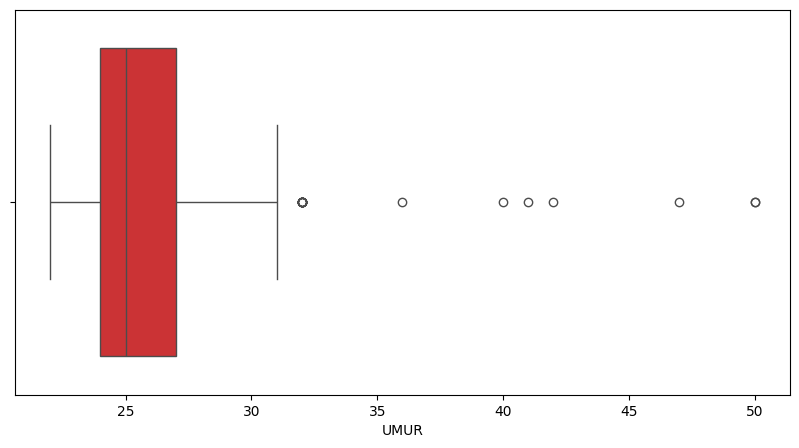

<Figure size 640x480 with 0 Axes>

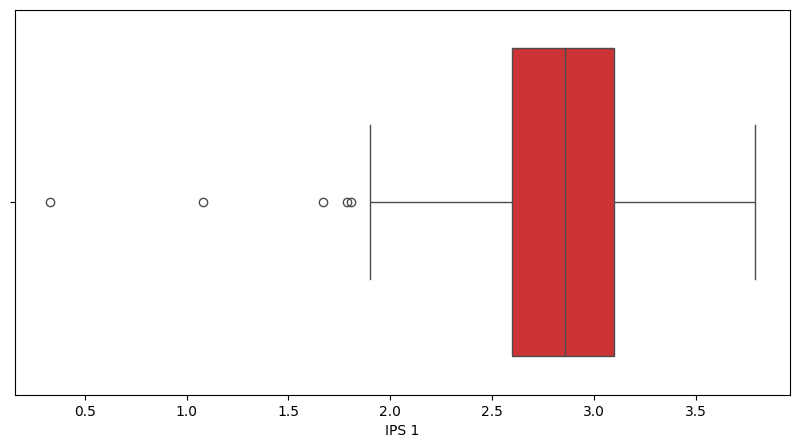

<Figure size 640x480 with 0 Axes>

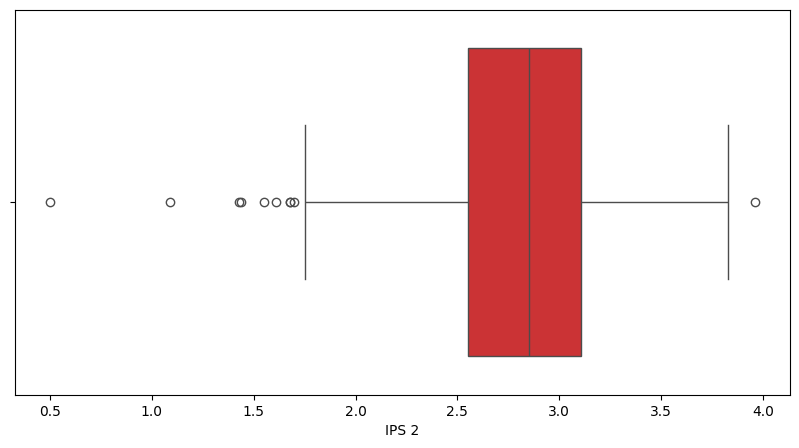

<Figure size 640x480 with 0 Axes>

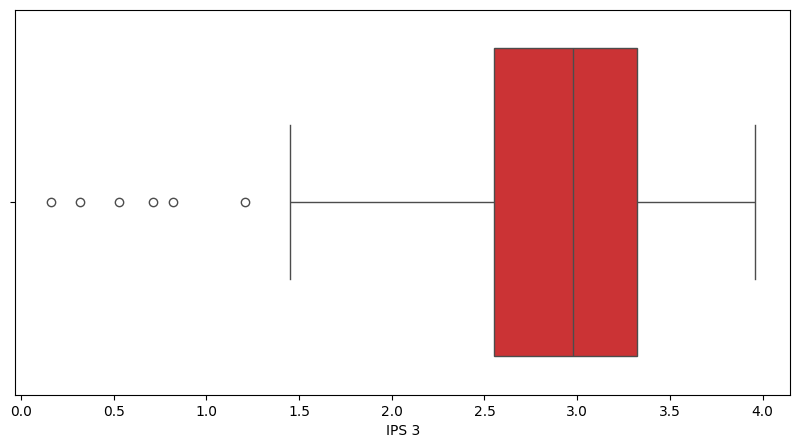

<Figure size 640x480 with 0 Axes>

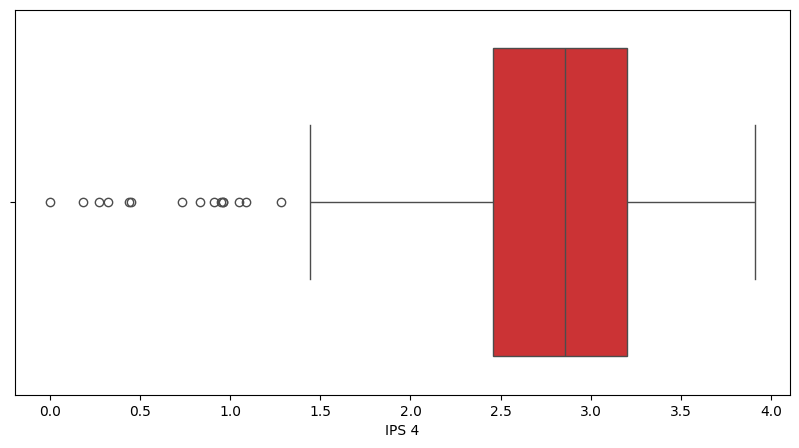

<Figure size 640x480 with 0 Axes>

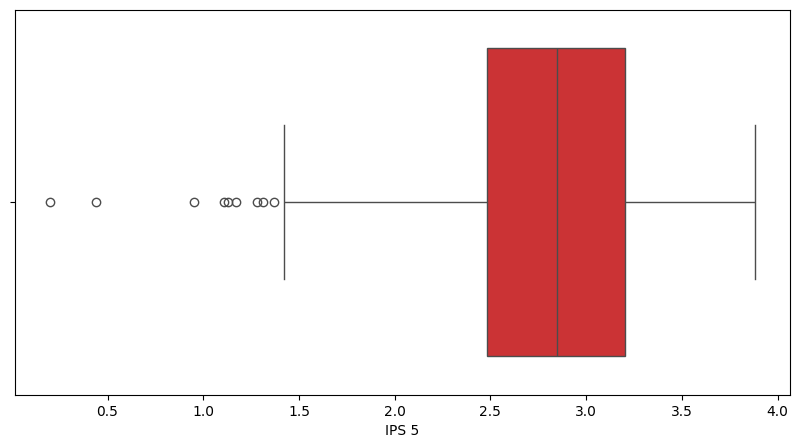

<Figure size 640x480 with 0 Axes>

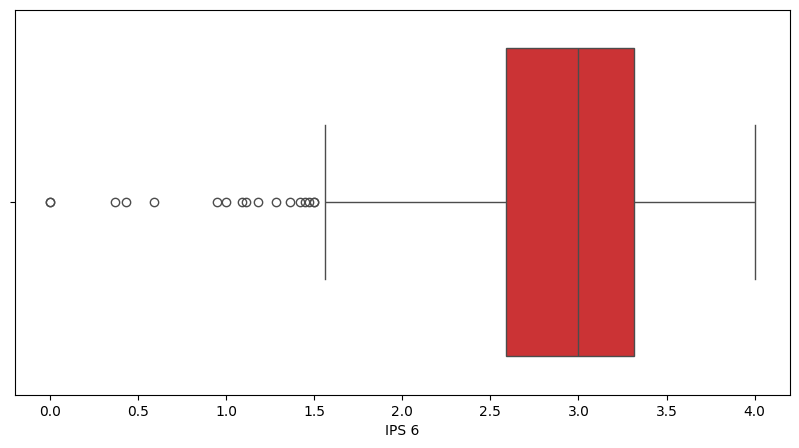

<Figure size 640x480 with 0 Axes>

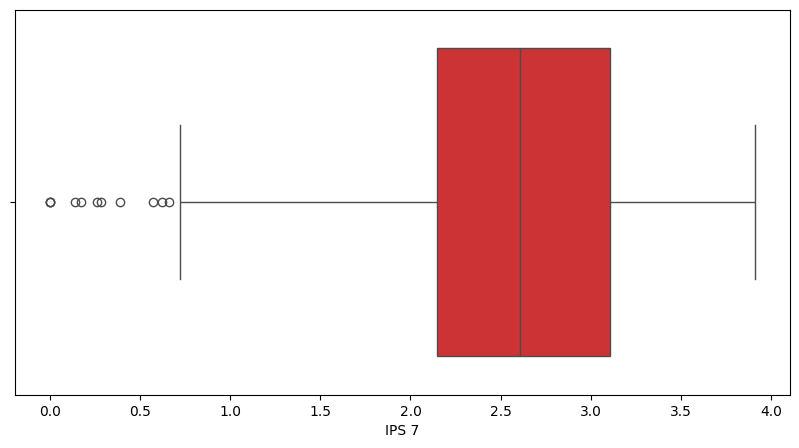

<Figure size 640x480 with 0 Axes>

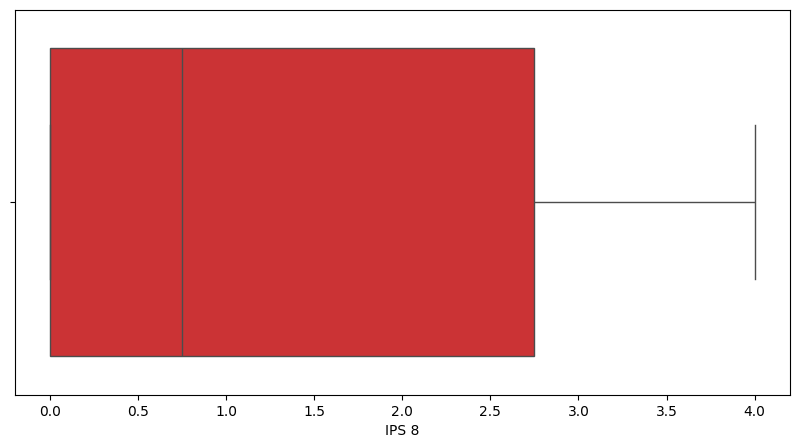

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_feat = ['UMUR', 'IPS 1', 'IPS 2','IPS 3','IPS 4', 'IPS 5','IPS 6', 'IPS 7', 'IPS 8']

for num in num_feat :
  plt.figure(figsize = (10,5))
  sns.boxplot(data = train, x = num, palette = 'Set1')
  plt.figure()

Heatmap dari korelasi antara beberapa kolom Train

Histogram untuk menunjukkan distribusi frekuensi atau pola distribusi dari suatu variabel numerik

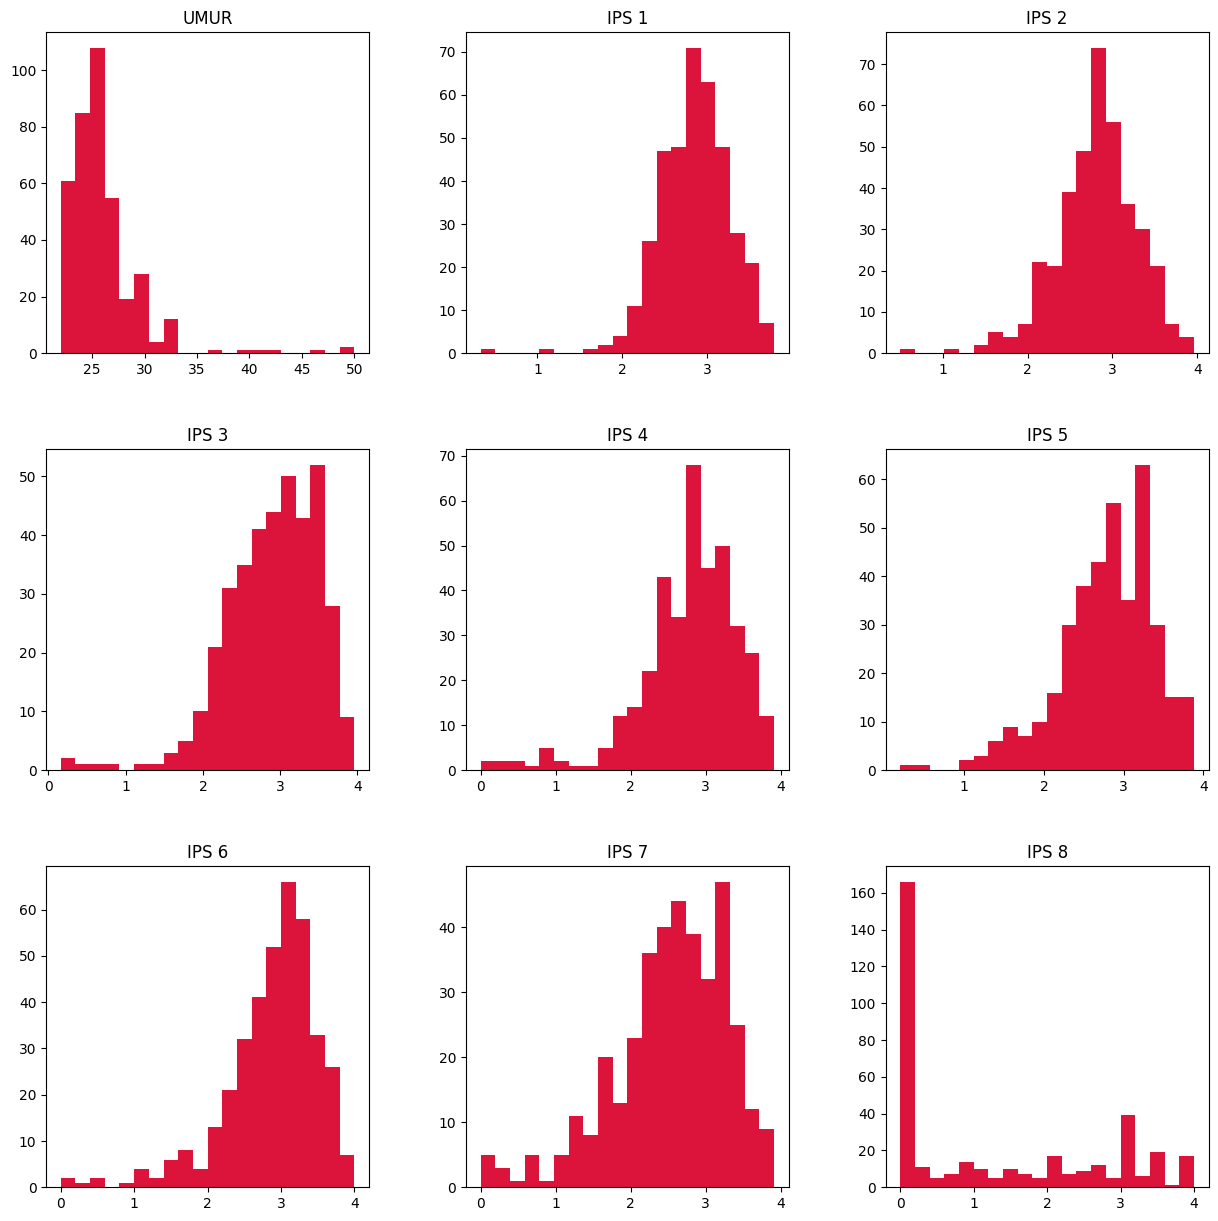

In [ ]:
data = train[['UMUR', 'IPS 1', 'IPS 2','IPS 3','IPS 4', 'IPS 5','IPS 6', 'IPS 7', 'IPS 8']]
data.hist(bins = 20, figsize = (15, 15), color = "crimson", grid = False)
plt.show()

Melihat hubungan antara pasangan variabel numerik

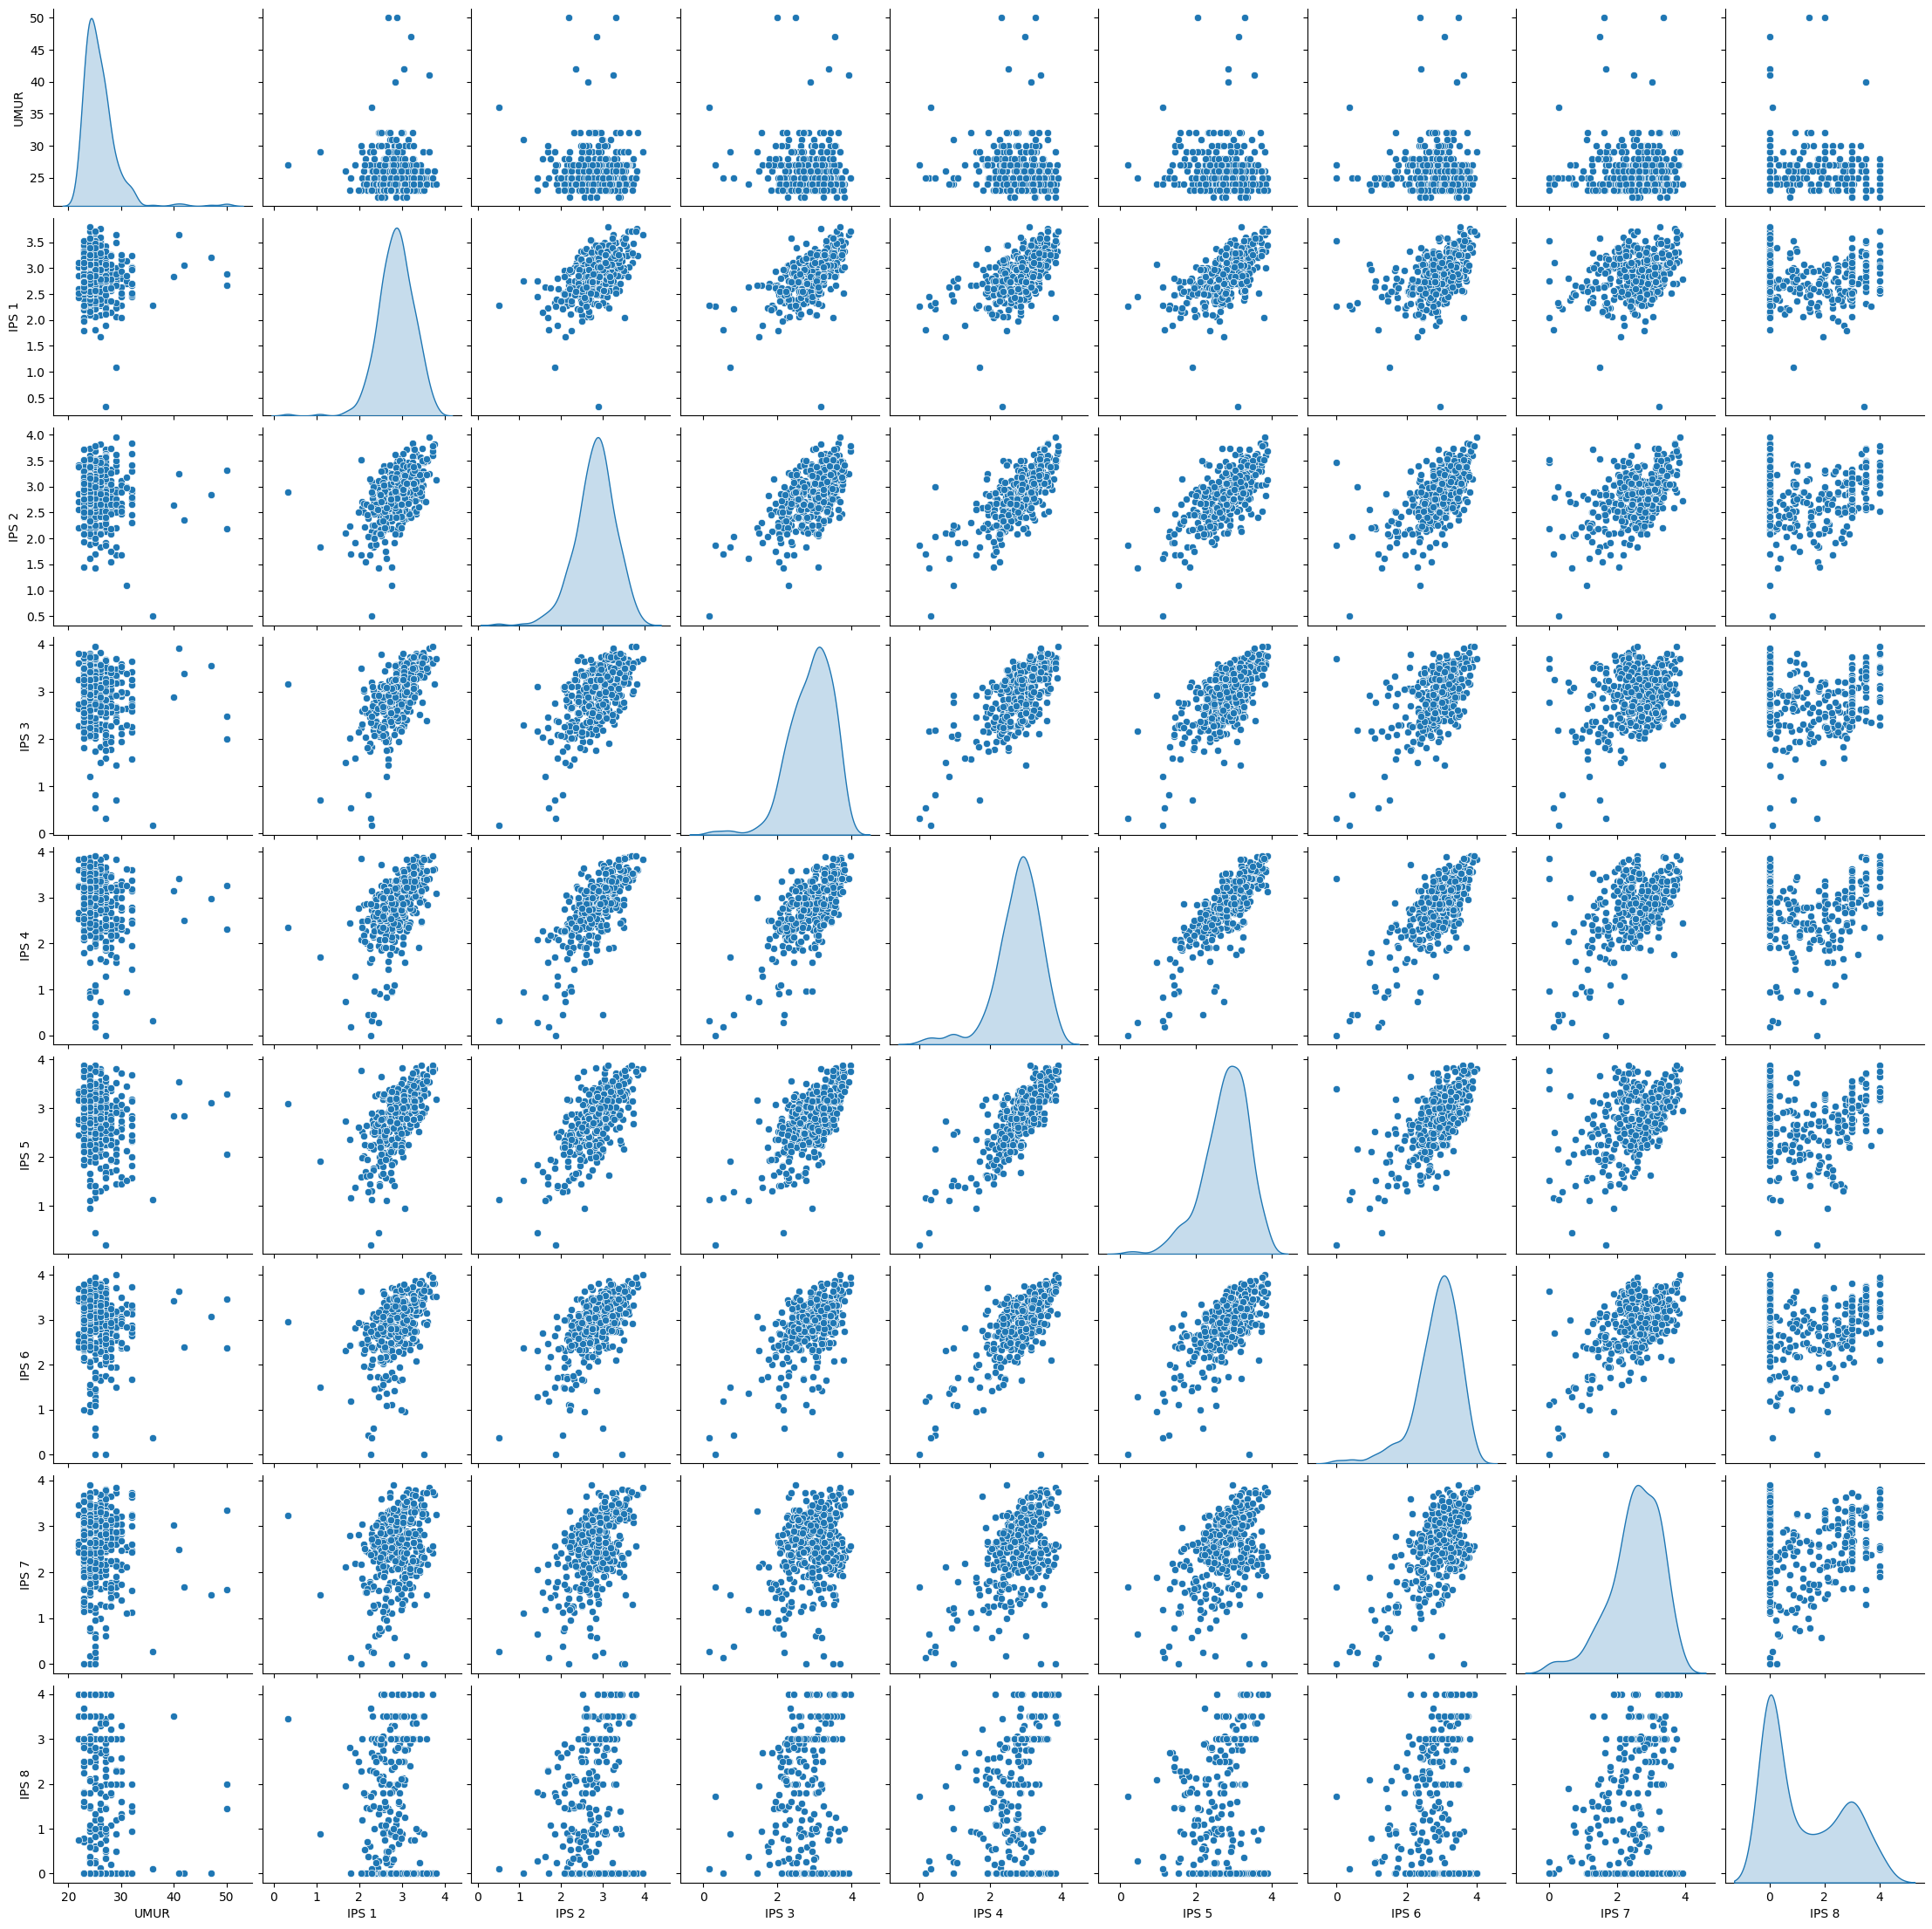

In [ ]:
#Numeric
sns.pairplot(data, diag_kind = 'kde')

Menampilkan matriks korelasi untuk fitur numerik

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

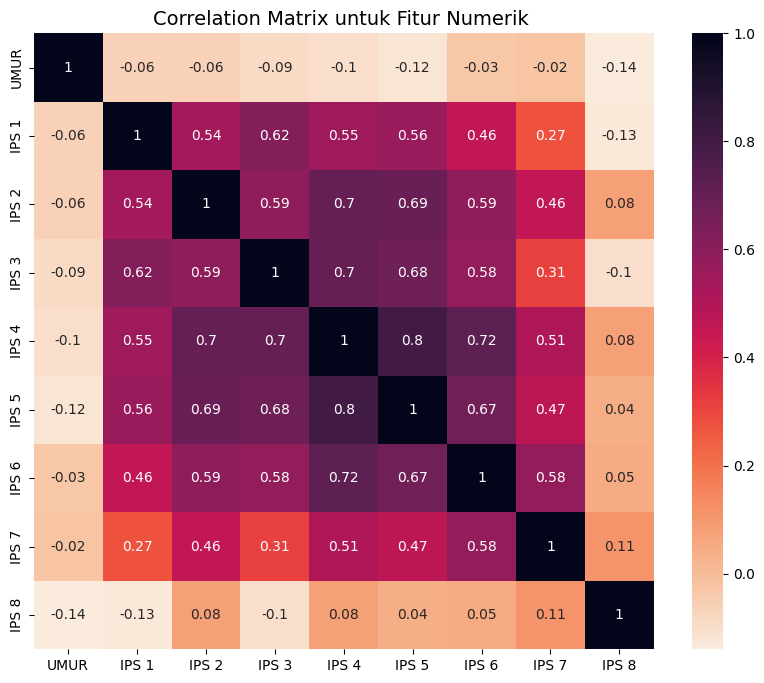

In [ ]:
#Skor korelasi
plt.figure(figsize = (10,8))
correlation_matrix = data.corr().round(2)

sns.heatmap(data = correlation_matrix, annot = True, cmap = 'rocket_r')
plt.title("Correlation Matrix untuk Fitur Numerik ", size = 14)

## Preprocessing Data

Tujuan dari preprocessing adalah untuk membersihkan, mentransformasi, dan mempersiapkan data sehingga sesuai untuk analisis atau pemodelan.

Fungsi lambda untuk mengubah nilai dalam kolom menjadi nilai numerik (1 atau 0) berdasarkan kondisi tertentu.

In [ ]:
train['JENIS KELAMIN'] = train['JENIS KELAMIN'].apply(lambda x: 1 if x == "LAKI - LAKI" else 0)
train['STATUS MAHASISWA'] = train['STATUS MAHASISWA'].apply(lambda x: 1 if x == "MAHASISWA" else 0)
train['STATUS NIKAH'] = train['STATUS NIKAH'].apply(lambda x: 1 if x == "BELUM MENIKAH" else 0)

In [ ]:
test['JENIS KELAMIN'] = test['JENIS KELAMIN'].apply(lambda x: 1 if x == "LAKI - LAKI" else 0)
test['STATUS MAHASISWA'] = test['STATUS MAHASISWA'].apply(lambda x: 1 if x == "MAHASISWA" else 0)
test['STATUS NIKAH'] = test['STATUS NIKAH'].apply(lambda x: 1 if x == "BELUM MENIKAH" else 0)

In [ ]:
train

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,0,0,28,1,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,0,1,32,1,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,0,0,29,1,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,0,1,27,1,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,0,0,29,1,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ARY JULI SETIYANTO,1,1,23,1,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,0.99,TEPAT
375,RINA ZAHROTUL UMAMI,0,0,23,1,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,TEPAT
376,TULISA WAHYUHADI KRISNATAMI,0,1,23,1,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,TEPAT
377,NI'MATUL JANNAH,0,1,23,1,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16,TEPAT


In [ ]:
test

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,1,1,24,1,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,0,1,26,1,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,1,1,29,1,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,1,1,27,1,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,0,1,25,1,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,ARY JULI SETIYANTO,1,1,23,1,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.50,0.99,TEPAT
141,RINA ZAHROTUL UMAMI,0,0,23,1,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,2.97,TEPAT
142,TULISA WAHYUHADI KRISNATAMI,0,1,23,1,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,3.03,TEPAT
143,NI'MATUL JANNAH,0,1,23,1,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.00,3.16,TEPAT


## Spliting Data

Dikarenakan data Train dan Test sudah terpisah sejak awal jadi cukup dengan langsung membuat variabel X_train, y_train, X_test, dan y_test

In [ ]:
# Drop rows with missing values
train.dropna(inplace=True)
test.dropna(inplace=True)

X_train = train[['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH','UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8']]
y_train = train['STATUS KELULUSAN']

X_test = test[['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH', 'UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8']]
y_test = test['STATUS KELULUSAN']

In [ ]:
X_train

,JENIS KELAMIN,STATUS MAHASISWA,STATUS NIKAH,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8
0,0,0,1,28,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0
1,0,1,1,32,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0
2,0,0,1,29,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0
3,0,1,1,27,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0
4,0,0,1,29,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
374,1,1,1,23,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5
375,0,0,1,23,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0
376,0,1,1,23,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0
377,0,1,1,23,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0


In [ ]:
y_test

,STATUS KELULUSAN
0,TEPAT
1,TEPAT
2,TEPAT
3,TEPAT
4,TEPAT
...,...
140,TEPAT
141,TEPAT
142,TEPAT
143,TEPAT


## Create Model

Import library yang dibutuhkan untuk membuat Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Membuat Fungsi untuk menghitung accuracy dari beberapa model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
def score(model, title = "Default"):
    model.fit(X_train, y_train)    # Untuk melakukan training dengan fit
    preds = model.predict(X_test)  # Untuk melakukan prediksi
#     print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

Memanggil Fungsi Score untuk menampilkan hasil accuracy

In [ ]:
#menghitung akurasi
knn = KNeighborsClassifier()
score(knn, "KNeighborsClassifier")

svm = SVC()
score(svm, "SVM")

Accuracy for KNeighborsClassifier : 0.96377 

Accuracy for SVM : 0.9058 



## K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
y_pred_knn

array(['TEPAT', 'TERLAMBAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TERLAMBAT', 'TEPAT', 'TERLAMBAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TERLAMBAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TERLAMBAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'T

Menampilkan hasil accuracy, precision, recal, dan classification report pada model

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_knn, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_knn, average='micro'))

print(classification_report(y_test, y_pred_knn))

Accuracy: 0.9637681159420289
Precision: 0.9637681159420289
Recall: 0.9637681159420289
              precision    recall  f1-score   support

       TEPAT       1.00      0.96      0.98       136
   TERLAMBAT       0.29      1.00      0.44         2

    accuracy                           0.96       138
   macro avg       0.64      0.98      0.71       138
weighted avg       0.99      0.96      0.97       138



## Support Vector Machine

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
y_pred_svc

array(['TEPAT', 'TERLAMBAT', 'TERLAMBAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TERLAMBAT', 'TEPAT', 'TERLAMBAT', 'TERLAMBAT',
       'TERLAMBAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TERLAMBAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TERLAMBAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TERLAMBAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TERLAMBAT', 'TEPAT',
       'TEPAT', 

Menampilkan hasil accuracy, precision, recal, dan classification report pada model

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svc))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_svc, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_svc, average='micro'))

print(classification_report(y_test, y_pred_svc))

Accuracy: 0.9057971014492754
Precision: 0.9057971014492754
Recall: 0.9057971014492754
              precision    recall  f1-score   support

       TEPAT       0.98      0.92      0.95       136
   TERLAMBAT       0.00      0.00      0.00         2

    accuracy                           0.91       138
   macro avg       0.49      0.46      0.48       138
weighted avg       0.97      0.91      0.94       138



## Model Evaluation

Memvisualisasikan dan memahami kinerja model dalam mengklasifikasikan kelas positif dan negatif

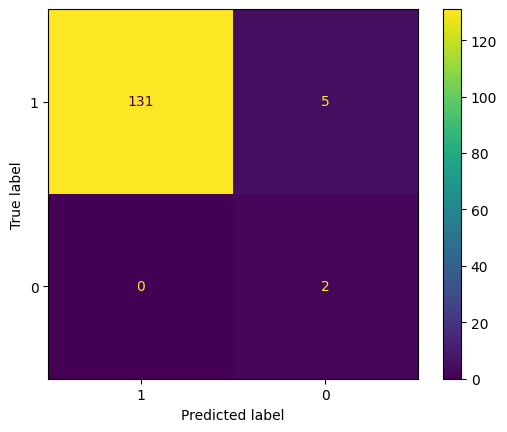

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matrix = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[1, 0])
disp.plot(cmap='viridis', values_format='')
plt.show()

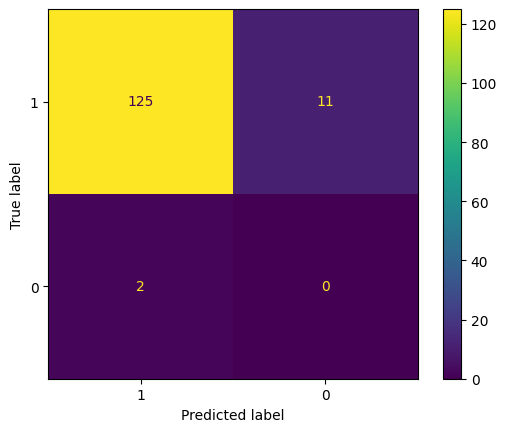

In [ ]:
matrix = confusion_matrix(y_test, y_pred_svc)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[1, 0])
disp.plot(cmap='viridis', values_format='')
plt.show()